In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from SRGAN_funcs.data_utils import load_and_combine_channels
from SRGAN_funcs.physics import navier_stokes_loss, divergence_loss, compute_grid_spacing, gradient

In [3]:
path = "../../data/train/HR/"

In [4]:
data = load_and_combine_channels(path, "ssh")
dx, dy, f = compute_grid_spacing(local=True)

In [5]:
ns_losses = np.array([navier_stokes_loss(x, f, dx=dx, dy=dy) for x in data])

bins = pd.cut(ns_losses, 25)
y_max = bins.value_counts().sort_values(ascending=False).iloc[0]

In [6]:
ns_losses.mean(), ns_losses.std()

(8.233481e-06, 2.3847272e-06)

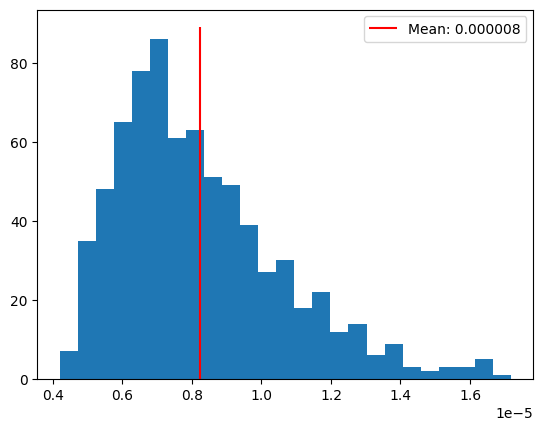

In [7]:
plt.hist(ns_losses, bins=25);
plt.vlines(ns_losses.mean(), 0, y_max+3, 'r', label=f'Mean: {ns_losses.mean():6f}')
plt.legend();

In [12]:
divs = np.array([divergence_loss(x, dx, dy) for x in data])

bins = pd.cut(divs, 25)
y_max = bins.value_counts().sort_values(ascending=False).iloc[0]

In [14]:
divs.mean(), divs.std()

(0.0001955497, 3.283825e-05)

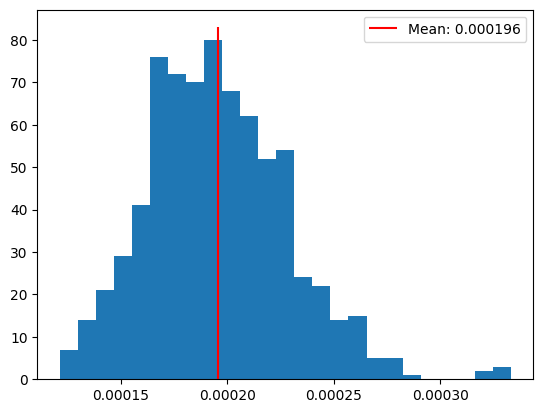

In [15]:
plt.hist(divs, bins=25);
plt.vlines(divs.mean(), 0, y_max+3, 'r', label=f'Mean: {divs.mean():6f}')
plt.legend();